In [13]:
import sys
from pathlib import Path
sys.path.append(str(Path().resolve().parents[0]))
from src.data_loader.load_data import load_portfolio_data
from src.tests.ab_tests import preprocess_data, prepare_ab_groups,check_categorical_balance, check_numeric_balance, calculate_claim_frequency, calculate_claim_severity, test_claim_frequency, test_claim_severity, plot_metric_by_group

In [14]:
# Load data
df = load_portfolio_data("../data/MachineLearningRating_v3.txt")
df = preprocess_data(df)

C:\Users\pc\Desktop\KAIM\insurance-risk-analytics-w3\src\data_loader\load_data.py:4: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep="|", parse_dates=['TransactionMonth'])


### Hypothesis 1: Risk Differences Across Provinces
H₀: There are no risk differences across provinces

In [15]:
# Select provinces 
province_a = "Western Cape"
province_b = "KwaZulu-Natal"

# Prepare A/B dataset
df_ab = prepare_ab_groups(df, province_a, province_b)

In [16]:
# --- Metric Calculations ---
freq_a = calculate_claim_frequency(df_ab[df_ab["Group"] == "A"])
freq_b = calculate_claim_frequency(df_ab[df_ab["Group"] == "B"])
sev_a = calculate_claim_severity(df_ab[df_ab["Group"] == "A"], claim_col='TotalClaims')
sev_b = calculate_claim_severity(df_ab[df_ab["Group"] == "B"], claim_col='TotalClaims')

print(f"\nClaim Frequency:\n  {province_a}: {freq_a:.4f} | {province_b}: {freq_b:.4f}")
print(f"Claim Severity:\n  {province_a}: {sev_a:.2f} | {province_b}: {sev_b:.2f}")



Claim Frequency:
  Western Cape: 0.0022 | KwaZulu-Natal: 0.0028
Claim Severity:
  Western Cape: 28095.85 | KwaZulu-Natal: 29609.49


In [17]:
# --- Hypothesis Tests ---
p_freq = test_claim_frequency(df_ab)
p_sev = test_claim_severity(df_ab)

print(f"\n Claim Frequency Test p-value: {p_freq:.4f} — {'❌ Fail to Reject' if p_freq > 0.05 else '✅ Reject Null'}")
print(f" Claim Severity Test p-value: {p_sev:.4f} — {'❌ Fail to Reject' if p_sev > 0.05 else '✅ Reject Null'}")



 Claim Frequency Test p-value: 0.0001 — ✅ Reject Null
 Claim Severity Test p-value: 0.6316 — ❌ Fail to Reject


C:\Users\pc\Desktop\KAIM\insurance-risk-analytics-w3\src\tests\ab_tests.py:68: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  values = df_ab.groupby("Group").apply(metric_func).reset_index(name="value")


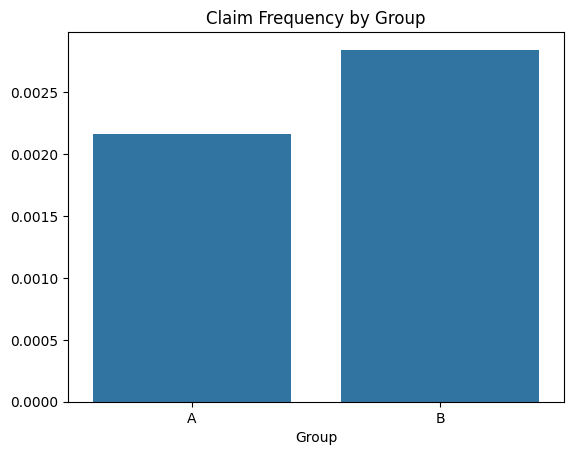

C:\Users\pc\Desktop\KAIM\insurance-risk-analytics-w3\src\tests\ab_tests.py:68: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  values = df_ab.groupby("Group").apply(metric_func).reset_index(name="value")


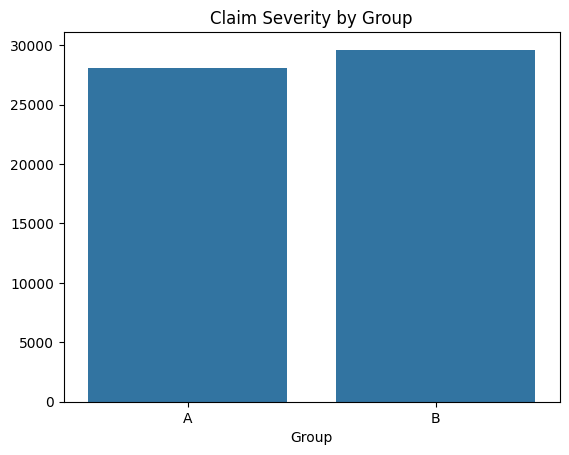

In [18]:
# --- Visualizations ---
plot_metric_by_group(df_ab, calculate_claim_frequency, "Claim Frequency by Group")
plot_metric_by_group(df_ab, calculate_claim_severity, "Claim Severity by Group")

We reject the null hypothesis for provinces (p < 0.01). Specifically, KwaZulu-Natal exhibits a higher claim frequency (0.28%) compared to Western Cape (0.22%) — a relative increase of ~27%. This indicates that policyholders in KwaZulu-Natal are more likely to submit claims than those in Western Cape.

This finding suggests that regional risk adjustments to base premiums may be warranted. Higher claim frequency in KwaZulu-Natal implies greater expected loss, so premium loading or stricter underwriting guidelines may be appropriate for that region.